In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle_Mental Health/train.csv")

data.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [3]:
data.shape

(140700, 20)

In [4]:
data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [45]:
def preprocess(df):

  df.loc[df['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'
  df.loc[df['Working Professional or Student'] == 'Working Professional', 'CGPA'] = '0'

  df['Study Satisfaction'] = df['Study Satisfaction'].astype(str)
  df['Job Satisfaction'] = df['Job Satisfaction'].astype(str)
  df['Study/Job Satisfaction'] = df['Study Satisfaction'].fillna('') + df['Job Satisfaction'].fillna('')

  df['Academic Pressure'] = df['Academic Pressure'].astype(str)
  df['Work Pressure'] = df['Work Pressure'].astype(str)
  df['Academic/Work Pressure'] = df['Academic Pressure'].fillna('') + df['Work Pressure'].fillna('')

  df['Study/Job Satisfaction'] = df['Study/Job Satisfaction'].str.replace('nan', '')
  df['Academic/Work Pressure'] = df['Academic/Work Pressure'].str.replace('nan', '')

  columns_to_drop = ['Job Satisfaction', 'Study Satisfaction', 'Academic Pressure', 'Work Pressure', 'id', 'Name']
  df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
preprocess(data)

In [15]:
cols = ['Gender', 'City', 'Age', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Financial Stress', 'Study/Job Satisfaction', 'Academic/Work Pressure', 'Depression']

for column in cols:
    print(f"Value counts for column '{column}':")
    print(data[column].value_counts())
    print()

Value counts for column 'Gender':
Gender
Male      77464
Female    63236
Name: count, dtype: int64

Value counts for column 'City':
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

Value counts for column 'Age':
Age
56.0    5246
49.0    5099
38.0    4564
53.0    4526
57.0    4395
47.0    4199
46.0    4080
54.0    3928
51.0    3927
18.0    3921
43.0    3856
59.0    3781
48.0    3695
45.0    3535
20.0    3515
50.0    3439
42.0    3393
24.0    3355
28.0    3338
39.0    3262
44.0    3217
41.0    3140
33.0    3140
29.0    3097
40.0    3094
58.0    2932
25.0    2931
23.0    2900
55.0    2846
35.0    2834
21.0    2742
37.0    2724
36.0    2703
19.0    2634
27.0    2613
52.0    2589
34.0    2578
31.0    2560
60.0    2501
26.0    2108
22.0    2066
30.0    1912
32.0    1785
Name: coun

In [16]:
columns_to_exclude = ['Age', 'CGPA', 'Sleep Duration']

for column in data.columns:
    if column not in columns_to_exclude:
        value_counts = data[column].value_counts()
        values_to_keep = value_counts[value_counts >= 10].index
        data = data[data[column].isin(values_to_keep)]

In [17]:
for column in data.columns:
    unique_values_count = data[column].nunique()
    print(f"Number of distinct values in column '{column}': {unique_values_count}")

Number of distinct values in column 'Gender': 2
Number of distinct values in column 'Age': 43
Number of distinct values in column 'City': 30
Number of distinct values in column 'Working Professional or Student': 2
Number of distinct values in column 'Profession': 36
Number of distinct values in column 'CGPA': 332
Number of distinct values in column 'Sleep Duration': 36
Number of distinct values in column 'Dietary Habits': 3
Number of distinct values in column 'Degree': 27
Number of distinct values in column 'Have you ever had suicidal thoughts ?': 2
Number of distinct values in column 'Work/Study Hours': 13
Number of distinct values in column 'Financial Stress': 5
Number of distinct values in column 'Family History of Mental Illness': 2
Number of distinct values in column 'Depression': 2
Number of distinct values in column 'Study/Job Satisfaction': 6
Number of distinct values in column 'Academic/Work Pressure': 6


In [18]:
data

,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Study/Job Satisfaction,Academic/Work Pressure
0,Female,49.0,Ludhiana,Working Professional,Chef,0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,Male,26.0,Varanasi,Working Professional,Teacher,0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,Male,33.0,Visakhapatnam,Student,Student,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,Male,22.0,Mumbai,Working Professional,Teacher,0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Ahmedabad,Working Professional,Teacher,0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,4.0,5.0
140696,Female,41.0,Hyderabad,Working Professional,Content Writer,0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,4.0,5.0
140697,Female,24.0,Kolkata,Working Professional,Marketing Manager,0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,1.0,3.0
140698,Female,49.0,Srinagar,Working Professional,Plumber,0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,2.0,5.0


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column].astype(str))
    else:
        data[column] = label_encoder.fit_transform(data[column])

In [20]:
data

,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Study/Job Satisfaction,Academic/Work Pressure
0,0,31,15,1,3,0,29,0,9,0,1,1,0,0,2,5
1,1,8,27,1,33,0,27,2,12,1,7,2,0,1,3,4
2,1,15,29,0,32,267,15,0,3,1,3,0,0,1,2,5
3,1,4,17,1,33,0,27,1,6,1,10,0,1,1,1,5
4,0,12,12,1,2,0,15,2,6,1,9,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,0,1,1,33,0,15,2,11,0,2,3,1,1,4,5
140696,0,23,8,1,7,0,19,1,4,1,6,4,1,0,4,5
140697,0,6,13,1,23,0,29,1,1,0,4,3,0,0,1,3
140698,0,31,23,1,27,0,15,1,23,1,10,0,0,0,2,5


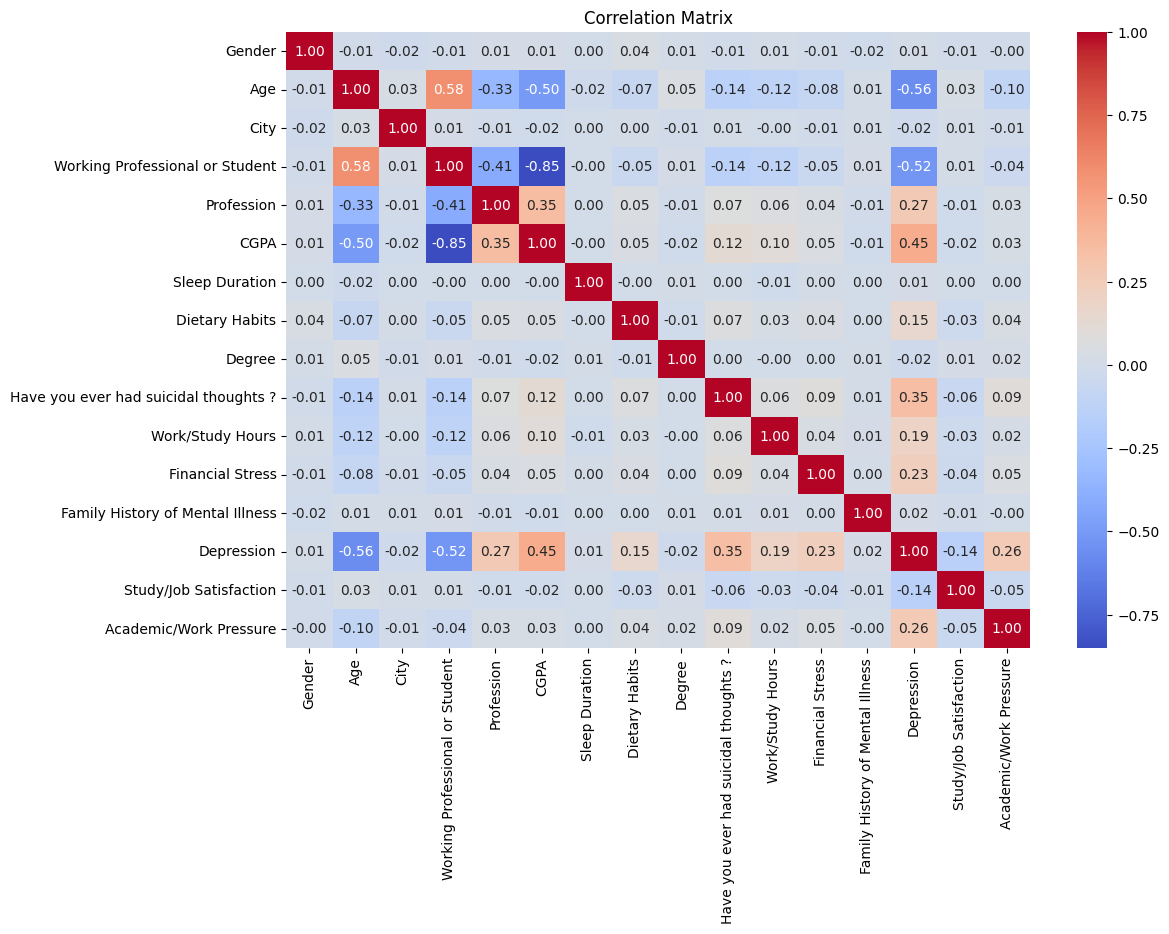

In [21]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

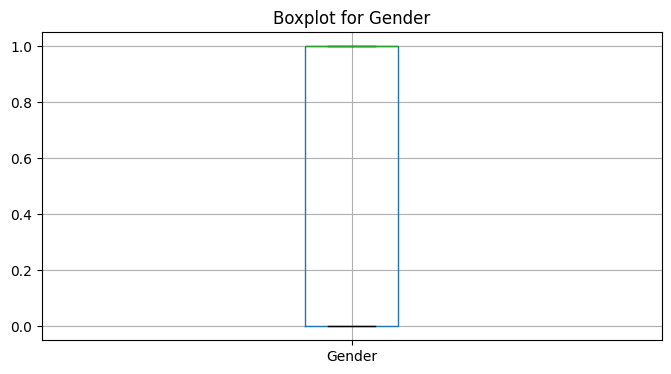

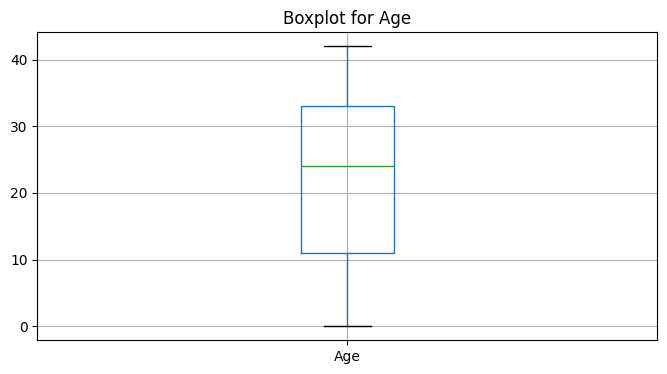

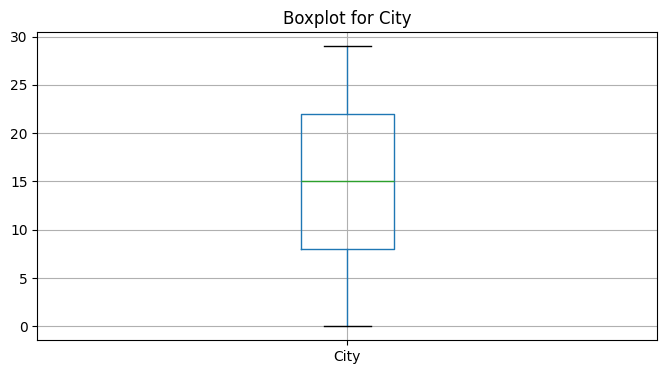

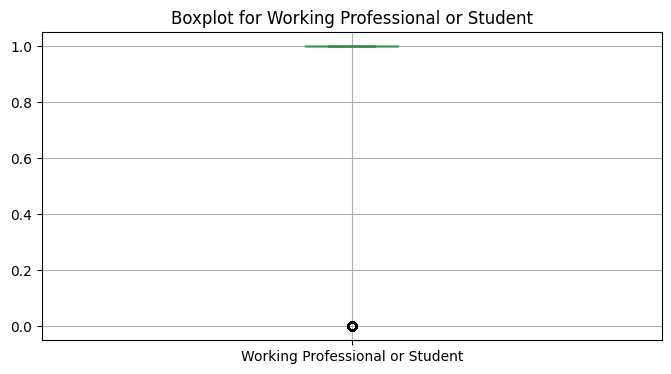

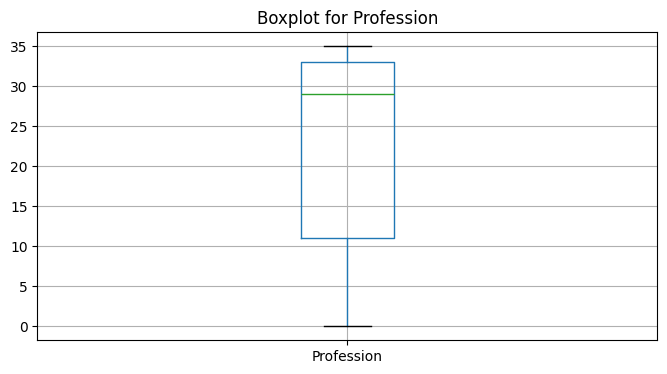

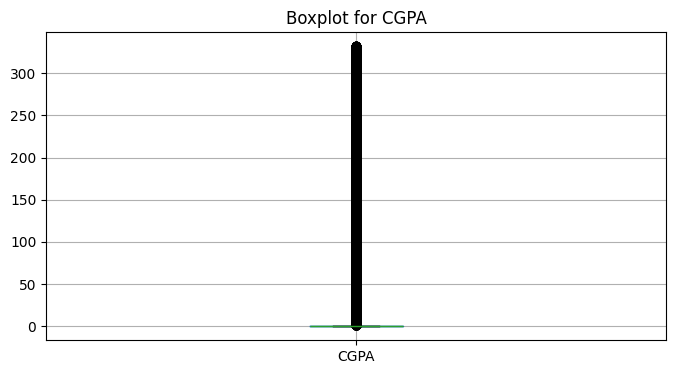

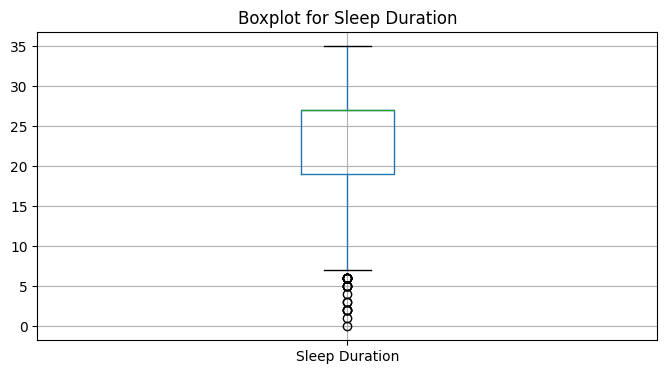

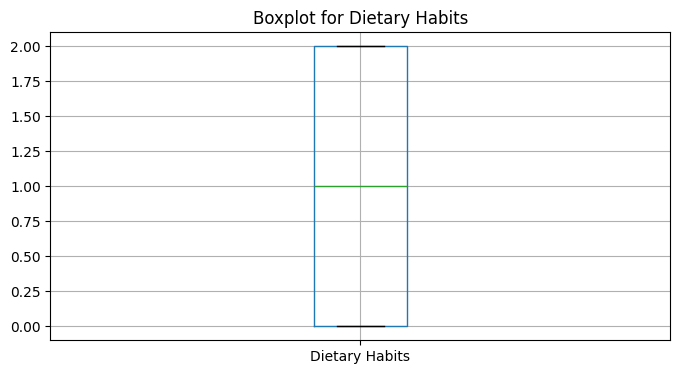

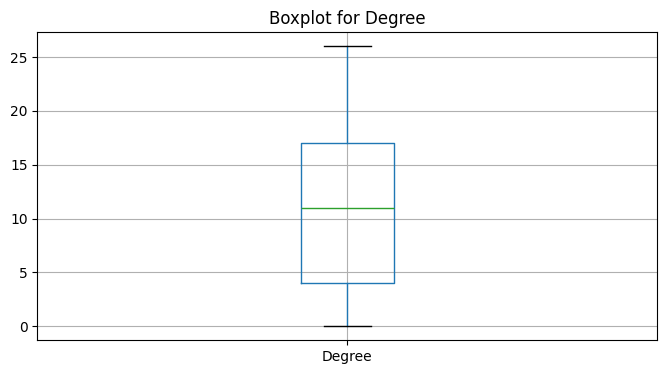

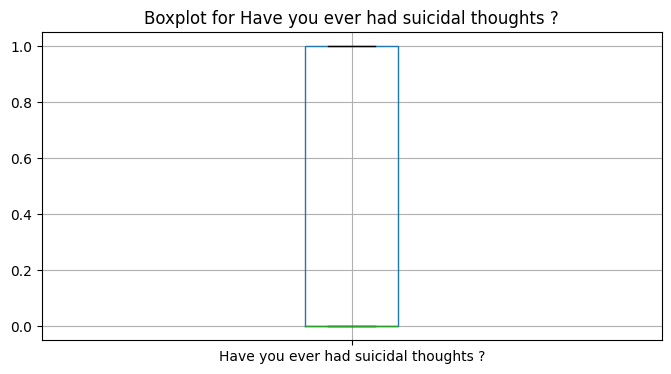

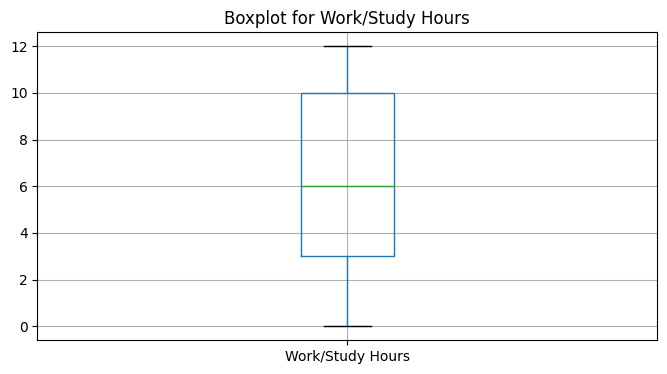

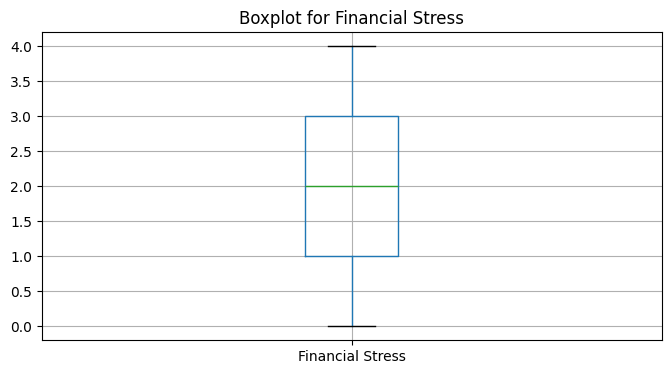

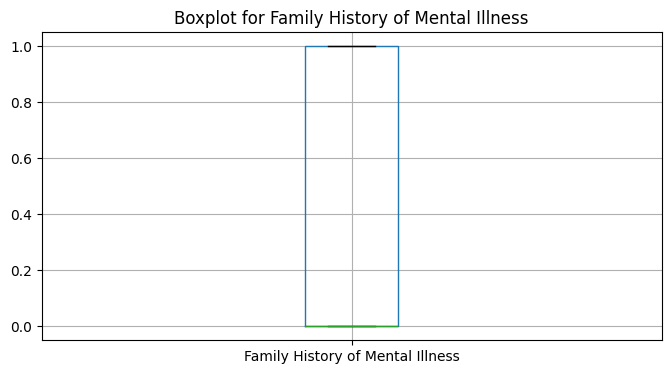

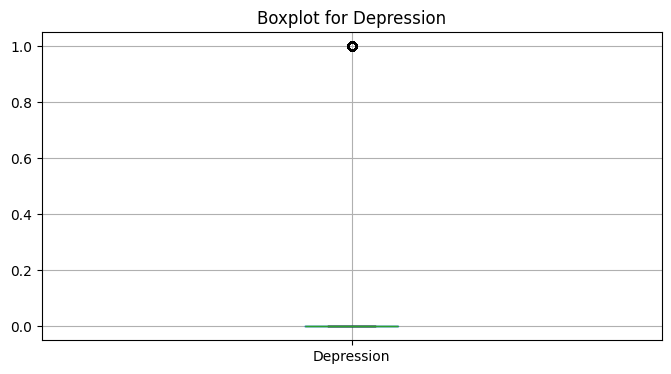

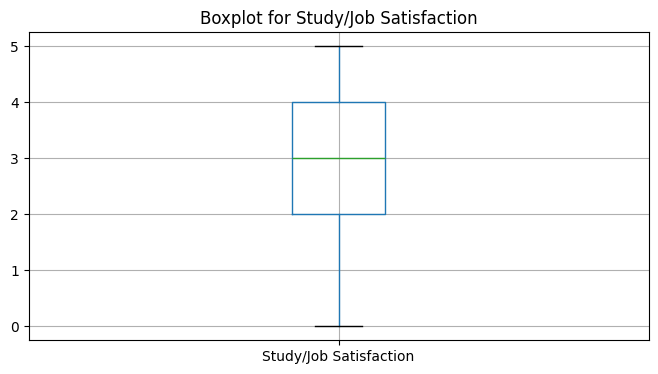

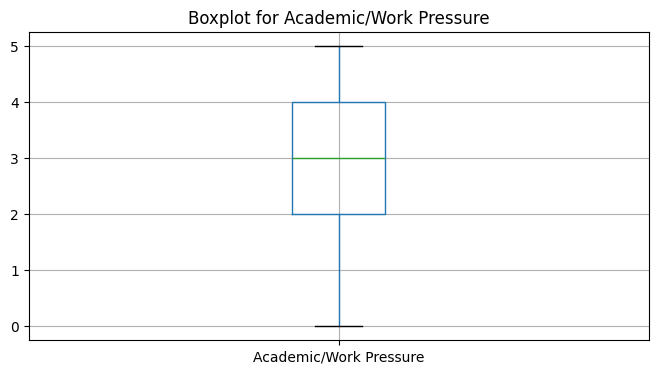

In [26]:
for column in data.columns:
    plt.figure(figsize=(8, 4))
    data.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [52]:
from sklearn.model_selection import train_test_split

X = data.drop('Depression', axis=1)
y = data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic(df):
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')

In [70]:
logistic(data)

Accuracy: 0.934657978136239


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.tree import DecisionTreeClassifier

def decisciontrees(df):
  dtree = DecisionTreeClassifier()
  dtree.fit(X_train, y_train)
  y_pred = dtree.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')

In [72]:
decisciontrees(data)

Accuracy: 0.9028593811202507


In [73]:
from sklearn.ensemble import RandomForestClassifier

def randomforest(df):
  rforest = RandomForestClassifier()
  rforest.fit(X_train, y_train)
  y_pred = rforest.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')

In [74]:
randomforest(data)

Accuracy: 0.9369013282056761


In [75]:
def cart(df):
  dct = DecisionTreeClassifier()
  dct.fit(X_train, y_train)
  y_pred = dct.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')

In [76]:
cart(data)

Accuracy: 0.9031798597015989


In [46]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_Mental Health/test.csv')

In [47]:
preprocess(test)

<ipython-input-45-1bc2a4ed3252>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Working Professional or Student'] == 'Working Professional', 'CGPA'] = '0'


In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in test.columns:
    if test[column].dtype == 'object':
        test[column] = label_encoder.fit_transform(test[column].astype(str))
    else:
        test[column] = label_encoder.fit_transform(test[column])

In [50]:
test

,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Study/Job Satisfaction,Academic/Work Pressure
0,1,36,67,1,26,0,25,12,53,0,9,2,1,5,2
1,0,41,25,1,18,0,25,12,16,0,6,3,0,4,2
2,1,36,21,1,54,0,16,12,12,1,12,3,0,1,5
3,0,5,47,0,51,124,27,12,35,1,10,3,0,1,6
4,1,30,22,1,54,0,16,12,28,1,3,3,0,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,32,21,1,42,0,25,12,35,1,2,1,1,5,3
93796,1,11,3,1,42,0,16,12,29,1,11,2,1,1,6
93797,1,6,67,0,51,169,16,12,23,0,7,0,0,4,1
93798,0,5,22,1,36,0,11,5,25,1,7,4,1,2,5


In [80]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

y_pred = rforest.predict(test)

In [81]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [82]:
df_results = pd.DataFrame(data=y_pred, columns=['predicted_label'])

df_results.to_excel('predicted_labels.xlsx', index=False)